# Paper Charts

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
sectors = pd.read_csv('data/sectors.csv')

In [21]:
avg_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='TOTAL EMISSIONS',
    aggfunc=np.mean
).reset_index().drop(index=0)

In [22]:
for col in avg_BySector.columns[1:]:
    avg_BySector[col] = (avg_BySector[col] / 100000).round(2)

In [23]:
scope1_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 1',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope1_BySector.columns[1:]:
    scope1_BySector[col] = (scope1_BySector[col] / 100000).round(2)

scope2_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 2 (location-based)',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope2_BySector.columns[1:]:
    scope2_BySector[col] = (scope2_BySector[col] / 100000).round(2)

scope3_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 3',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope3_BySector.columns[1:]:
    scope3_BySector[col] = (scope3_BySector[col] / 100000).round(2)

Text(0.5, 0.98, 'Average Total Emissions by Sector Over Time (2018 - 2022)')

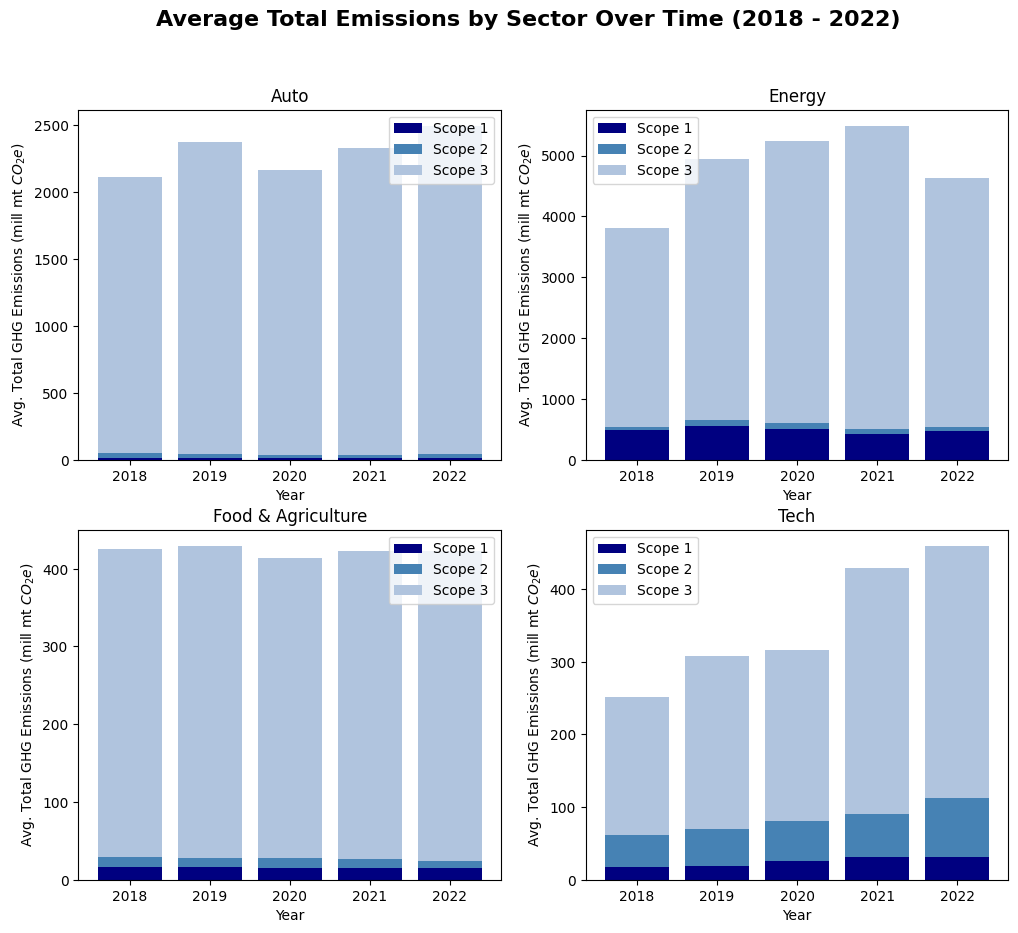

In [24]:
n=1
plt.figure(figsize=[12,10])
for col in avg_BySector.columns[1:]:
    plt.subplot(2,2,n)
    plt.bar(scope1_BySector['YEAR'], height=scope1_BySector[col], color='navy', label='Scope 1')
    plt.bar(scope2_BySector['YEAR'], height=scope2_BySector[col], bottom=scope1_BySector[col], color='steelblue', label='Scope 2')
    plt.bar(scope3_BySector['YEAR'], height=scope3_BySector[col], bottom=scope1_BySector[col]+scope2_BySector[col], color='lightsteelblue', label='Scope 3')


    plt.xlabel('Year')
    plt.ylabel('Avg. Total GHG Emissions (mill mt $CO_{2}e$)')
    plt.title(col)
    plt.ylim(0, )
    plt.legend()
    n+=1
plt.suptitle('Average Total Emissions by Sector Over Time (2018 - 2022)', fontsize=16, fontweight='bold')


In [25]:
auto = sectors[(sectors['SECTOR']=='Auto') & (sectors['YEAR']!=2017) & (sectors['COMPANY NAME']!='Hyundai')& (sectors['COMPANY NAME']!='Toyota')]

In [26]:
def ci_OverTime(sector):

    companies = sectors.loc[sectors['SECTOR']==sector, 'COMPANY NAME'].unique()
    years = ['2018','2019', '2020', '2021', '2022']

    for co in companies:
        ci = sectors[sectors['COMPANY NAME'] == co]["Adjusted CI"]
        plt.plot(years, ci, label = co, marker='o', markersize=5)
    plt.legend(loc = 'upper right', fontsize = 'xx-small')
    plt.xlabel('Year')
    plt.ylabel('Carbon Intensity (mt $CO_{2}e$ / mill USD)')
    plt.title(sector +  ' Carbon Intensity Over Time (2018-2022)');

In [27]:
auto['YEAR'].unique()
auto[auto['COMPANY NAME'] == 'Tesla']["Adjusted CI"]

165      NaN
166      NaN
167      NaN
168    10.92
169     7.49
Name: Adjusted CI, dtype: float64

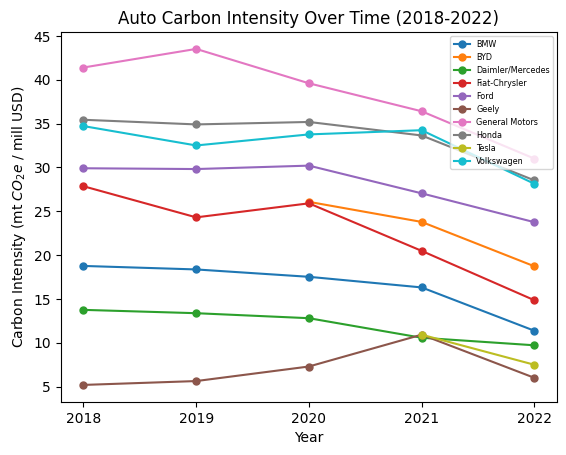

In [28]:
companies = auto.loc[:,'COMPANY NAME'].unique()
years = ['2018','2019', '2020', '2021', '2022']

for co in companies:
    ci = auto[auto['COMPANY NAME'] == co]["Adjusted CI"]
    plt.plot(years, ci, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity (mt $CO_{2}e$ / mill USD)')
plt.title('Auto' +  ' Carbon Intensity Over Time (2018-2022)');

In [29]:
sectors

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,SBTi TARGET SET?,SBTI COMMITMENTS,NET-ZERO TARGETS,SECTOR,CARBON INTENSITY\n(Scope 1 & 2 g CO2e / $ Sales),REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,24431839.0,30516104.0,54619.0,USD,111.390,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,26484447.0,32301059.0,52329.0,USD,111.150,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,23652933.0,28962596.0,46881.0,USD,113.260,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,26527444.0,31725330.0,54304.0,USD,95.720,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,24136111.0,29009205.0,57786.0,USD,84.330,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,57786.0,84.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,TSMC,2018,2125725.0,7001655.0,4315604.0,13442984.0,1031000.0,TWD,8.853,Taiwan,True,False,NaN,Net-zero by 2050,Tech,NaN,30930.0,295.10
213,TSMC,2019,2071743.0,7350195.0,5307729.0,14729667.0,1069950.0,TWD,8.806,Taiwan,True,False,NaN,Net-zero by 2050,Tech,NaN,32098.5,293.53
214,TSMC,2020,2010692.0,8282509.0,5571946.0,15865147.0,1339000.0,TWD,7.687,Taiwan,True,False,NaN,Net-zero by 2050,Tech,NaN,40170.0,256.24
215,TSMC,2021,2151937.0,9196964.0,6127157.0,17476058.0,1587420.0,TWD,7.149,Taiwan,True,False,NaN,Net-zero by 2050,Tech,NaN,47622.6,238.31


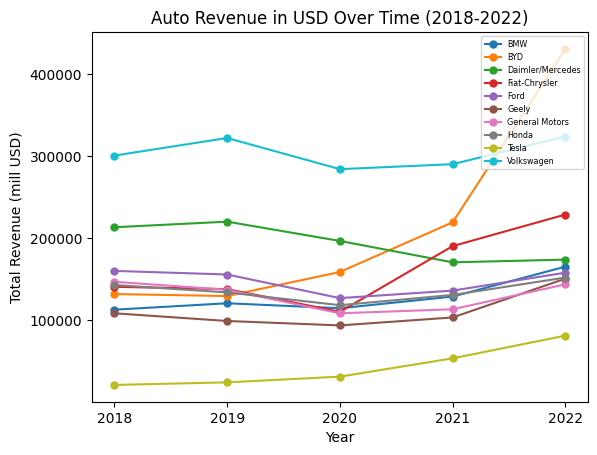

In [30]:
companies = auto.loc[:,'COMPANY NAME'].unique()
years = ['2018','2019', '2020', '2021', '2022']

for co in companies:
    rev = auto[auto['COMPANY NAME'] == co]["REVENUE IN USD"]
    plt.plot(years, rev, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Total Revenue (mill USD)')
plt.title('Auto' +  ' Revenue in USD Over Time (2018-2022)');

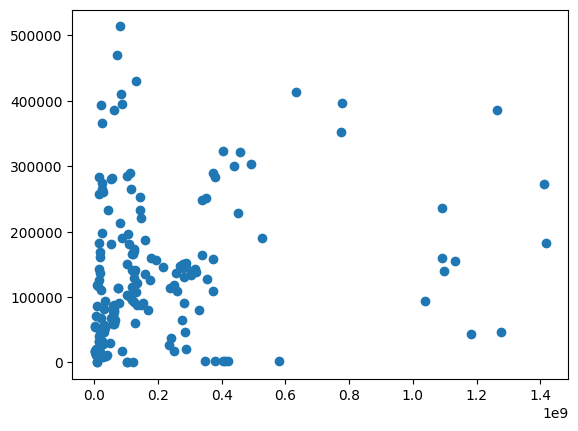

In [31]:
import seaborn as sns
plt.scatter(sectors['TOTAL EMISSIONS'], sectors['REVENUE IN USD'])

In [45]:
emissions = sectors[['SCOPE 1', 'SCOPE 2 (location-based)', 'SCOPE 3', 'TOTAL EMISSIONS']]
# sns.pairplot(emissions)
scope1_BySector['YEAR'].values

array([2018, 2019, 2020, 2021, 2022])

In [65]:
avgci_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='Adjusted CI',
    aggfunc = np.mean
).round(0).reset_index().drop([0])
avgci_BySector

SECTOR,YEAR,Auto,Energy,Food & Agriculture,Tech
1,2018,4556.0,559.0,65.0,72.0
2,2019,3968.0,727.0,62.0,67.0
3,2020,3246.0,855.0,63.0,62.0
4,2021,2725.0,436.0,57.0,63.0
5,2022,296.0,308.0,49.0,60.0


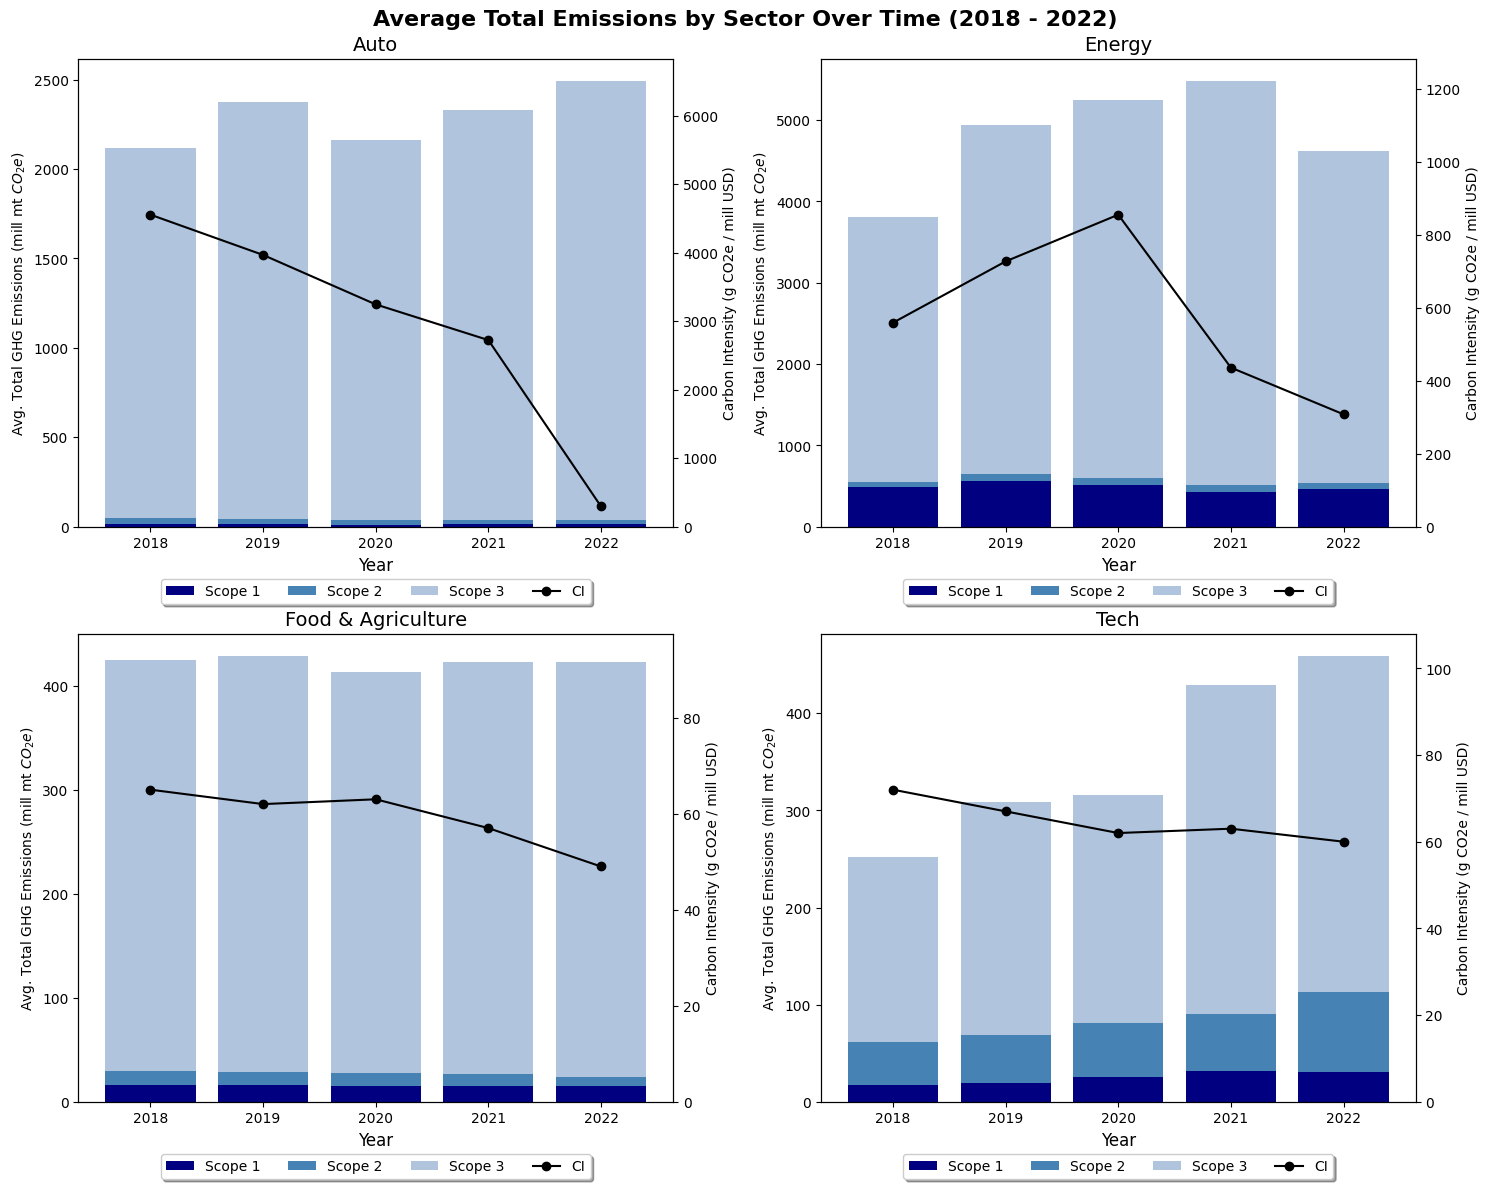

In [91]:
n=0
row = [0, 0, 1, 1]
colu = [0, 1, 0, 1]
fig, ax1 = plt.subplots(2, 2, figsize=[15,12])
for col in avg_BySector.columns[1:]:
    ax1[row[n],colu[n]].bar(scope1_BySector['YEAR'], height=scope1_BySector[col], color='navy', label='Scope 1')
    ax1[row[n],colu[n]].bar(scope2_BySector['YEAR'], height=scope2_BySector[col], bottom=scope1_BySector[col], color='steelblue', label='Scope 2')
    ax1[row[n],colu[n]].bar(scope3_BySector['YEAR'], height=scope3_BySector[col], bottom=scope1_BySector[col]+scope2_BySector[col], color='lightsteelblue', label='Scope 3')

    ax2 = ax1[row[n],colu[n]].twinx()
    ax2.plot(avgci_BySector['YEAR'], avgci_BySector[col], color = 'black', marker = 'o', label='CI')
    


    ax1[row[n],colu[n]].set_xlabel('Year', fontsize=12)
    ax1[row[n],colu[n]].set_ylabel('Avg. Total GHG Emissions (mill mt $CO_{2}e$)')
    ax2.set_ylabel('Carbon Intensity (g CO2e / mill USD)')
    ax2.set_ylim(0, max(avgci_BySector[col])*1.5)
    plt.title(col, fontsize=14)
    plt.ylim(0, )
    lines, labels = ax1[row[n],colu[n]].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.18), fancybox=True, shadow=True, ncol=4)
    # plt.legend()
    n+=1

plt.suptitle('Average Total Emissions by Sector Over Time (2018 - 2022)', fontsize=16, fontweight='bold')
plt.tight_layout()


In [99]:
food = sectors[sectors['SECTOR']=='Food & Agriculture']

In [103]:
food_corr = food.corr(numeric_only=True)

In [106]:
food_corr.round(2)

,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CARBON INTENSITY,SBTi TARGET SET?,CARBON INTENSITY\n(Scope 1 & 2 g CO2e / $ Sales),REVENUE IN USD,Adjusted CI
YEAR,1.00,-0.04,-0.16,0.00,-0.00,0.06,-0.26,-0.00,NaN,0.06,-0.20
SCOPE 1,-0.04,1.00,0.82,0.55,0.59,0.78,0.44,0.13,NaN,0.66,0.46
SCOPE 2 (location-based),-0.16,0.82,1.00,0.65,0.68,0.76,0.40,0.18,NaN,0.66,0.41
SCOPE 3,0.00,0.55,0.65,1.00,1.00,0.90,-0.31,-0.24,NaN,0.92,-0.28
TOTAL EMISSIONS,-0.00,0.59,0.68,1.00,1.00,0.92,-0.27,-0.22,NaN,0.93,-0.24
TOTAL REVENUE (miillion $),0.06,0.78,0.76,0.90,0.92,1.00,-0.13,-0.22,NaN,0.98,-0.09
CARBON INTENSITY,-0.26,0.44,0.40,-0.31,-0.27,-0.13,1.00,0.53,NaN,-0.29,0.99
SBTi TARGET SET?,-0.00,0.13,0.18,-0.24,-0.22,-0.22,0.53,1.00,NaN,-0.40,0.51
CARBON INTENSITY\n(Scope 1 & 2 g CO2e / $ Sales),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REVENUE IN USD,0.06,0.66,0.66,0.92,0.93,0.98,-0.29,-0.40,NaN,1.00,-0.26
